In [38]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from math import sqrt, e, pi
from numpy import linalg, cov

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
samples = norm.rvs(size=1000)
ax.plot(x, norm.pdf(x), 'r-', lw=3, label='Norm pdf')
ax.legend(loc='best', frameon=False)

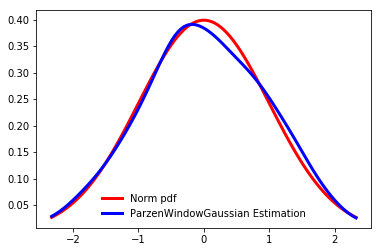

In [40]:
def gaussian_kernel(sigma, X, sample_X):
    return e ** (-linalg.norm(X - sample_X) ** 2 / (2 * sigma ** 2)) / (sqrt(2 * pi * sigma ** 2))


def find_amise_optimal_sigma(covariance_diagonals, n, d=1):
    if type(covariance_diagonals) != list:  # 0d case
        covariance_diagonals = [covariance_diagonals]
    sum_covariance = sum(covariance_diagonals)
    sigma = sqrt(sum_covariance / d)
    return sigma * (4 / ((2*d + 1)*n))**(1/(d+4))


def parzen_window_gaussian(X, sample_X):
    n = len(sample_X)
    results = []
    optimal_sigma = find_amise_optimal_sigma(cov(sample_X), n)
    for x in X:
        sum = 0
        for sample_x in sample_X:
            sum += gaussian_kernel(optimal_sigma, x, sample_x)
        results.append(sum)
    return [result / n for result in results]
    
ax.plot(x, parzen_window_gaussian(x, samples), 'b-', lw=3, label='ParzenWindowGaussian Estimation')
ax.legend(loc='best', frameon=False)
plt.show()